# $2 \times 2$ RGQFT Multiplier

This is a `8`-qubit circuit.

In [1]:
from qiskit import *

***

First we build a `rgqft-multiplier` circuit.

In [2]:
from qiskit.circuit.library import RGQFTMultiplier

In [3]:
mult = RGQFTMultiplier(2)  # 2 qubit type
rgqft = mult.to_gate()

`rgqft` is 2-qubit HRS Cumulative Multiplier.

***

Building the Circuit

In [4]:
inp = QuantumRegister(4, 'input')
out = QuantumRegister(4, 'output')
cbit = ClassicalRegister(4, 'cbits')
multiplier = QuantumCircuit(inp, out, cbit)

In [5]:
# taking input

for i in range(4) :
    multiplier.x(inp[i])

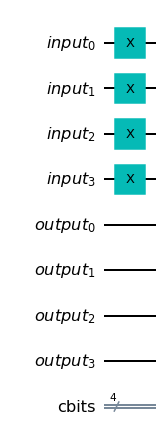

In [6]:
multiplier.draw('mpl')

In [7]:
# Add Multiplier Block to Circuit

multiplier.barrier()
multiplier.append(rgqft,[inp[0],inp[1],inp[2],inp[3],out[0],out[1],out[2],out[3]])
multiplier.barrier()

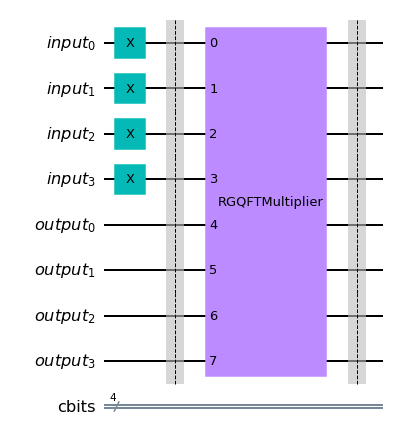

In [8]:
multiplier.draw('mpl')

In [9]:
# adding measure gates
multiplier.measure(out[0], cbit[0])
multiplier.measure(out[1], cbit[1])
multiplier.measure(out[2], cbit[2])
multiplier.measure(out[3], cbit[3])

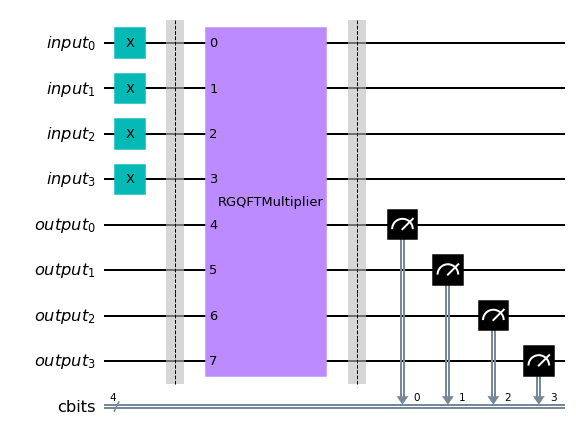

In [10]:
multiplier.draw('mpl')

***

After building the circuit, we simulate it.

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(multiplier, simulator).result()

In [12]:
from qiskit.visualization import plot_histogram

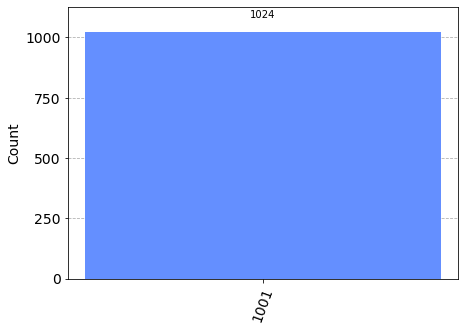

In [13]:
counts = result.get_counts()
plot_histogram(counts)

***

HANOI - NOISY SIMULATION

Simulation-1

In [14]:
from qiskit.providers.fake_provider import FakeHanoi
from qiskit.providers.aer import AerSimulator

In [15]:
# simulating the circuit on a fake simulator

hanoi = FakeHanoi()
simulator = AerSimulator.from_backend(hanoi)

In [16]:
compiled_circuit = transpile(multiplier, simulator)

In [17]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 1.52 s
Wall time: 808 ms


In [18]:
fake_counts = result.get_counts()

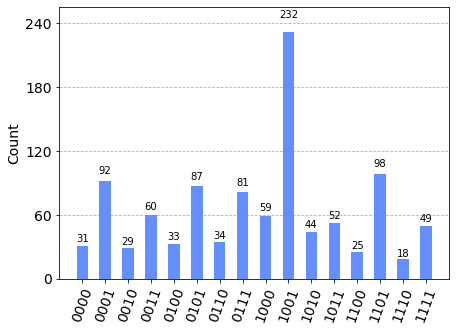

In [19]:
plot_histogram(fake_counts)

***

Simulation-2

In [20]:
# simulating the circuit on a fake simulator

hanoi = FakeHanoi()
simulator = AerSimulator.from_backend(hanoi)

In [21]:
compiled_circuit = transpile(multiplier, simulator)

In [22]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 1.77 s
Wall time: 834 ms


In [23]:
fake_counts = result.get_counts()

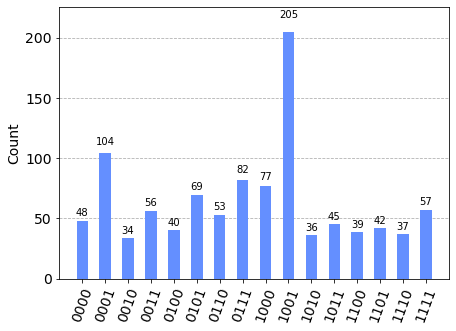

In [24]:
plot_histogram(fake_counts)

***

Simulation-3

In [25]:
# simulating the circuit on a fake simulator

hanoi = FakeHanoi()
simulator = AerSimulator.from_backend(hanoi)

In [26]:
compiled_circuit = transpile(multiplier, simulator)

In [27]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 1.67 s
Wall time: 890 ms


In [28]:
fake_counts = result.get_counts()

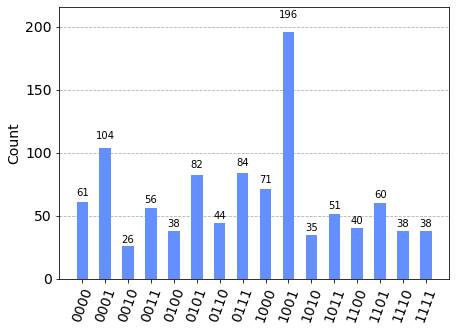

In [29]:
plot_histogram(fake_counts)